<a href="https://colab.research.google.com/github/summaiyamus/NLP-Tasks/blob/main/Speech_Emotion_Recognition_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [2]:
#libraries to improt autio files
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa #for audio
import librosa.display
from IPython.display import Audio #to play audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [5]:

# TESS dataset directory
tess_dataset_directory = '/content/drive/MyDrive/MyEnglishDataset/Tess'

# RAVDESS dataset directory
ravdess_dataset_directory = '/content/drive/MyDrive/MyEnglishDataset/Ravdess'

# Define the list of target emotions
target_emotions = ['happy', 'sad', 'angry', 'neutral']

# For TESS dataset
tess_paths = []
tess_labels = []

for dirname, _, filenames in os.walk(tess_dataset_directory):
    for filename in filenames:
        label = filename.split('_')[-1].split('.')[0].lower()
        if label in target_emotions:
            tess_paths.append(os.path.join(dirname, filename))
            tess_labels.append(label)

tess_filtered_df = pd.DataFrame({'Path': tess_paths, 'Emotions': tess_labels})

# For RAVDESS dataset
ravdess_paths = []
ravdess_emotions = []

ravdess_directory_list = os.listdir(ravdess_dataset_directory)

for dir in ravdess_directory_list:

  actor = os.listdir(os.path.join(ravdess_dataset_directory, dir))

  for file in actor:
    part = file.split('.')[0]
    part=part.split('-')
    emotion = int(part[2])
    # print(file , emotion)
    if emotion in [3, 4, 5, 1]:
       # happy, sad, angry, and neutral
       ravdess_emotions.append(emotion)
       ravdess_paths.append(os.path.join(ravdess_dataset_directory, dir, file))
# print(ravdess_emotions)
ravdess_filtered_df = pd.DataFrame({'Path': ravdess_paths, 'Emotions': ravdess_emotions})

# Changing integers to actual emotions in RAVDESS
ravdess_filtered_df['Emotions'] = ravdess_filtered_df['Emotions'].replace({1: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry'})

# Now, tess_filtered_df and ravdess_filtered_df contain only the 'happy,' 'sad,' 'angry,' and 'neutral' emotions


In [63]:
from IPython.display import Audio
import IPython.display as ipd

# Filter the RAVDESS DataFrame for the "happy" label
happy_samples = ravdess_filtered_df[ravdess_filtered_df['Emotions'] == 'happy']

# Play all the "happy" audio samples one by one
# for audio_path in happy_samples['Path']:
    # ipd.display(Audio(audio_path))


In [6]:
# creating Dataframe using all the 2 dataframes we created so far.
data_path = pd.concat([ravdess_filtered_df, tess_filtered_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Path,Emotions
0,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,angry
1,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,neutral
2,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,angry
3,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,happy
4,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,neutral


In [32]:
len(data_path)

3872

In [8]:
data_path[:5]

,Path,Emotions
0,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,angry
1,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,neutral
2,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,angry
3,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,happy
4,/content/drive/MyDrive/MyEnglishDataset/Ravdes...,neutral


In [10]:
# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])
# Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# ## Create a dataframe
# df = pd.DataFrame()
# df['speech'] = paths
# df['label'] = labels
# df.head()

,speech,label


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
data_path['Emotions'].value_counts()

angry      992
happy      992
sad        992
neutral    896
Name: Emotions, dtype: int64

## Exploratory Data Analysis

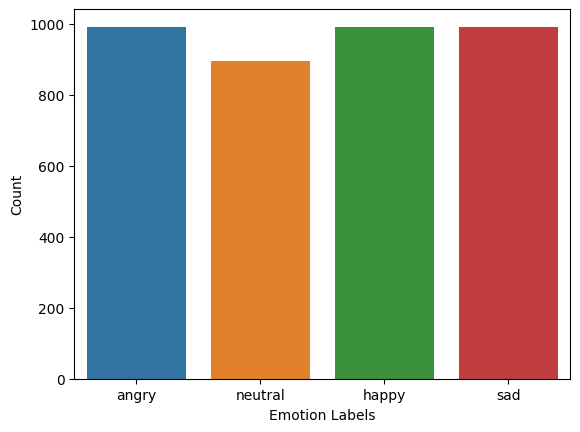

In [11]:
# sns.countplot(ravdess_filtered_df['Emotions'])

# Create a countplot of emotion labels
sns.countplot(data=data_path, x='Emotions')

# Set labels for the x and y axes
plt.xlabel('Emotion Labels')
plt.ylabel('Count')

# Show the plot
plt.show()

#all are equal , if not then do class balanacing

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [1]:
# emotion = 'fear'
# path = np.array(df['speech'][df['label']==emotion])[1]
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

NameError: ignored

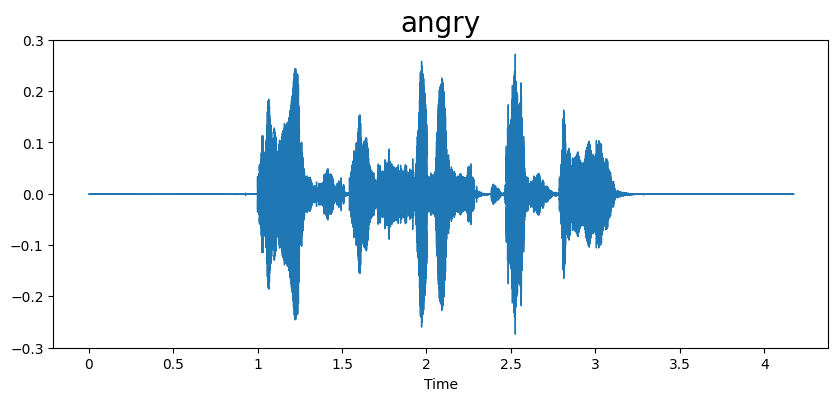

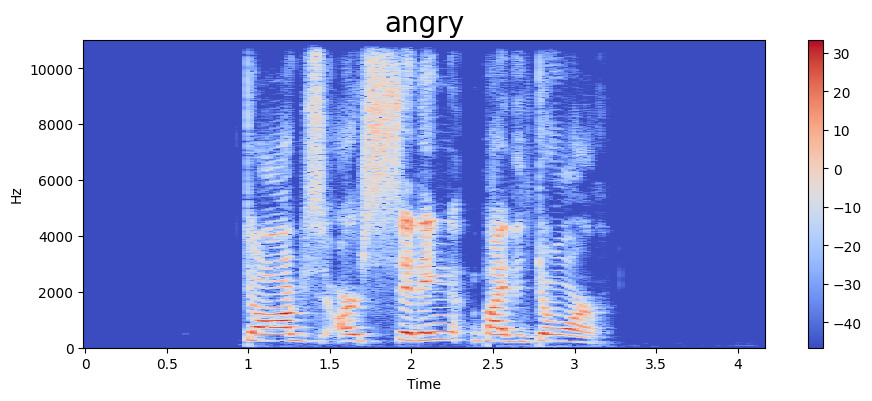

In [13]:
emotion = 'angry'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

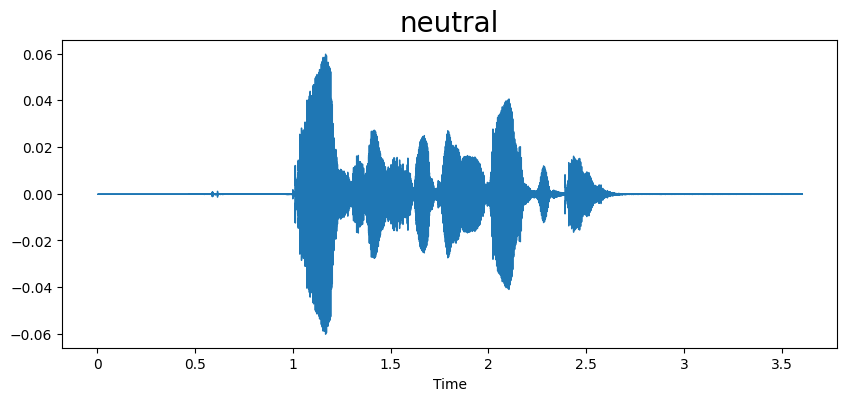

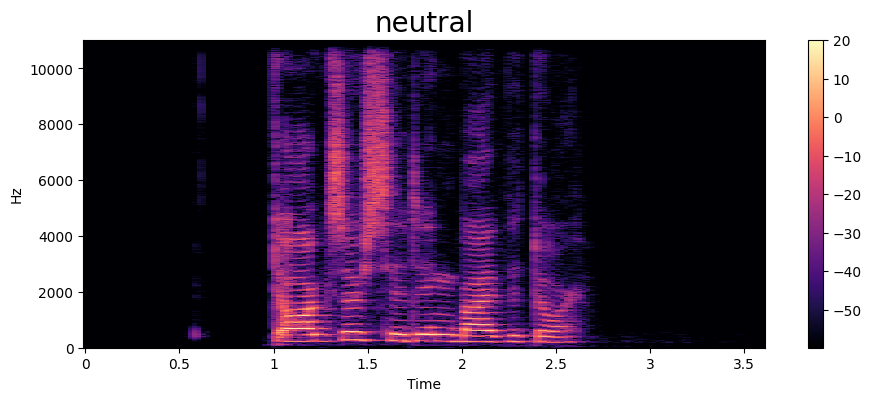

In [14]:
emotion = 'neutral'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

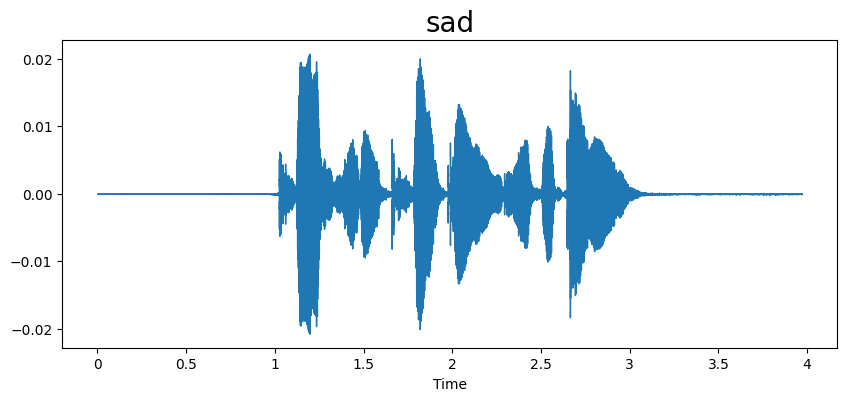

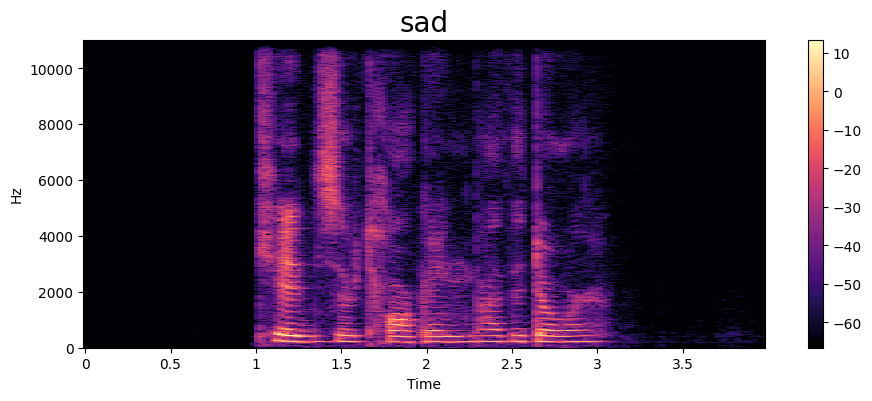

In [15]:
emotion = 'sad'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

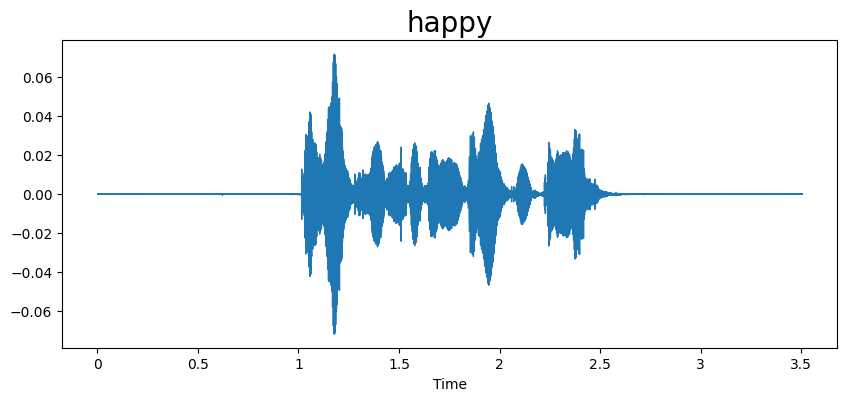

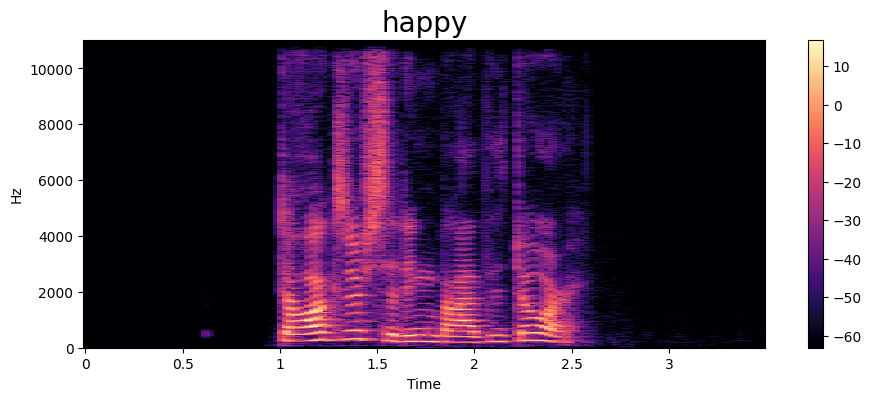

In [34]:
emotion = 'happy'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [35]:

def extract_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Apply the extract_mfcc function to each file path in the 'Path' column of the  dataset
data_path['MFCC'] = data_path['Path'].apply(extract_mfcc)


# def extract_mfcc(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
#     return mfcc

In [38]:
X_mfcc=data_path['MFCC']
X_mfcc
# extract_mfcc(data_path['Path'][0])

0       [[-681.7939, -681.7939, -681.7939, -681.7939, ...
1       [[-835.38354, -835.38354, -835.38354, -835.383...
2       [[-665.2921, -665.2921, -665.2921, -665.2921, ...
3       [[-852.54364, -852.54364, -852.54364, -852.543...
4       [[-831.14825, -831.14825, -831.14825, -831.148...
                              ...                        
3195    [[-769.0404, -740.52966, -650.4334, -572.31396...
3196    [[-669.00757, -706.69104, -769.6032, -766.2859...
3197    [[-781.9848, -773.4845, -773.62177, -768.102, ...
3198    [[-749.82733, -743.573, -648.9754, -547.6658, ...
3199    [[-773.8028, -759.01245, -735.225, -665.68494,...
Name: MFCC, Length: 3872, dtype: object

In [42]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape



ValueError: ignored

In [29]:
## input split
X = np.expand_dims(X, -1)
X.shape

(20, 70, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_64 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 7)               

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 18ms/step - loss: 1.0892 - accuracy: 0.6201 - val_loss: 2.0684 - val_accuracy: 0.2946
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3742 - accuracy: 0.8598 - val_loss: 2.4078 - val_accuracy: 0.2054
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1671 - accuracy: 0.9487 - val_loss: 1.9055 - val_accuracy: 0.4446
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1672 - accuracy: 0.9442 - val_loss: 2.7364 - val_accuracy: 0.3179
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9683 - val_loss: 1.8414 - val_accuracy: 0.5607
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1082 - accuracy: 0.9585 - val_loss: 2.7303 - val_accuracy: 0.4679
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1275 - accuracy: 0.9656 - val_loss: 1.2245 - val_accuracy: 0.7232
Epoch 8/50
35/35 [=

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

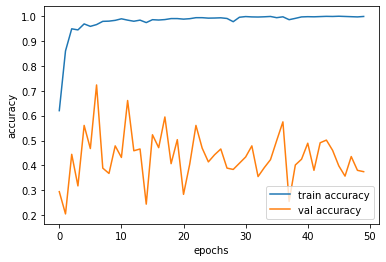

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

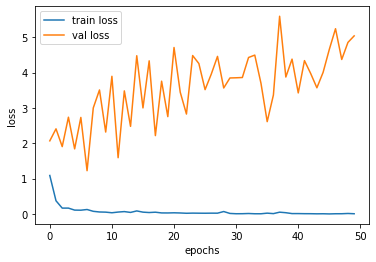

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()